<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [3]:
import pandas as pd

#Start Here
df = pd.read_csv(r'C:\Users\lesle\Desktop\lambda\Unit 4 Sprint 1\DS-Unit-4-Sprint-1-NLP\module1-text-data\data\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [4]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [5]:
import texthero as hero

In [6]:
df['text'] = hero.clean(df['reviews.text'])

In [7]:
df['text']

0        order one item bad quality missing backup spri...
1          bulk always less expensive way go products like
2                                well duracell price happy
3        seem work well name brand batteries much bette...
4                       batteries long lasting price great
                               ...                        
28327    got yr old twins yr old one one better perfect...
28328           bought niece christmas gift years old love
28329    nice light internet browsing keeping top email...
28330    tablet absolutely everything want watch tv sho...
28331    ninety dollars expectionations low still good ...
Name: text, Length: 28332, dtype: object

In [8]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [9]:
stop_words = nlp.Defaults.stop_words.union(['amazon'])

def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        conditions = (token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON') and (token is not stop_words)
        if conditions:
            lemmas.append(token.lemma_)
    
    return lemmas

In [11]:
df['lemmas'] = df['text'].apply(get_lemmas)

In [12]:
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [13]:
id2word = corpora.Dictionary(df['lemmas'])

In [14]:
id2word.filter_extremes(no_below=50, no_above=.90)

In [15]:
corpus = [id2word.doc2bow(doc) for doc in df['lemmas']]

In [16]:
lda = LdaMulticore(corpus=corpus, 
                   id2word=id2word,
                   num_topics = 5, 
                   passes=100,
                   workers=12, 
                   random_state=812
                  )

In [17]:
lda.print_topics()

[(0,
  '0.054*"tablet" + 0.024*"fire" + 0.023*"good" + 0.023*"great" + 0.022*"amazon" + 0.020*"screen" + 0.018*"price" + 0.016*"nice" + 0.015*"kindle" + 0.013*"buy"'),
 (1,
  '0.112*"love" + 0.066*"buy" + 0.048*"old" + 0.046*"use" + 0.039*"easy" + 0.037*"year" + 0.034*"tablet" + 0.030*"gift" + 0.030*"great" + 0.029*"kindle"'),
 (2,
  '0.068*"kid" + 0.053*"tablet" + 0.032*"great" + 0.030*"game" + 0.028*"love" + 0.028*"app" + 0.023*"child" + 0.021*"time" + 0.020*"year" + 0.020*"play"'),
 (3,
  '0.096*"battery" + 0.055*"great" + 0.054*"good" + 0.049*"price" + 0.036*"work" + 0.029*"long" + 0.023*"buy" + 0.020*"brand" + 0.018*"product" + 0.017*"amazon"'),
 (4,
  '0.052*"read" + 0.045*"book" + 0.032*"use" + 0.029*"easy" + 0.028*"kindle" + 0.026*"great" + 0.024*"app" + 0.023*"tablet" + 0.018*"play" + 0.018*"light"')]

In [18]:
import re

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [19]:
topics = [' '.join(t[0:5]) for t in words]

In [20]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
tablet fire good great amazon

------ Topic 1 ------
love buy old use easy

------ Topic 2 ------
kid tablet great game love

------ Topic 3 ------
battery great good price work

------ Topic 4 ------
read book use easy kindle



In [21]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [23]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.260452 -0.085955       1        1  32.069912
0      0.108052  0.037011       2        1  22.792068
4     -0.045684  0.207662       3        1  15.481552
2     -0.150847  0.027414       4        1  15.263416
1     -0.171974 -0.186133       5        1  14.393048, topic_info=        Term         Freq        Total Category  logprob  loglift
1    battery  8578.000000  8578.000000  Default  30.0000  30.0000
70      love  6138.000000  6138.000000  Default  29.0000  29.0000
134      kid  2874.000000  2874.000000  Default  28.0000  28.0000
413     read  2237.000000  2237.000000  Default  27.0000  27.0000
528     book  1953.000000  1953.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
163      new   349.502533  1040.230225   Topic5  -4.7400   0.8477
414     fire   476.230469  2453.078125   Topic5  -4.4306   0.2992
10   product   324.602051  2623.005615   Topic5  -4.8139  -0.1511
29      good   220.307678  7537.692871   Topic5  -5.2015  -1.5942
74      want   202.223221  1282.758667   Topic5  -5.2872   0.0910

[328 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
746       2  0.996185          16
47        1  0.999307          aa
48        1  0.996504         aaa
468       5  0.998914  absolutely
560       2  0.006400      access
...     ...       ...         ...
329       1  0.997203        wrap
80        4  0.366799        year
80        5  0.632908        year
458       4  0.996853       young
610       4  0.998175          yr

[493 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 3, 2])

In [24]:
doc_topics = [lda[doc] for doc in corpus]

In [25]:
def update(doc):
        d_dist = {k:0 for k in range(0,5)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in doc_topics]

In [26]:
dft = pd.DataFrame.from_records(new_distro)
dft.columns = topics

In [28]:
dft.head()

,tablet fire good great amazon,love buy old use easy,kid tablet great game love,battery great good price work,read book use easy kindle
0,0.025674,0.025080,0.025016,0.898996,0.025233
1,0.034086,0.033528,0.033821,0.864659,0.033906
2,0.050738,0.053293,0.050252,0.795440,0.050277
3,0.033720,0.033393,0.033364,0.866031,0.033492
4,0.033480,0.033433,0.033441,0.866207,0.033438


In [30]:
df['primary_topic'] = dft.idxmax(axis=1)

In [31]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,text,lemmas,primary_topic
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",order one item bad quality missing backup spri...,"[order, item, bad, quality, miss, backup, spri...",battery great good price work
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",bulk always less expensive way go products like,"[bulk, expensive, way, product, like]",battery great good price work
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",well duracell price happy,"[duracell, price, happy]",battery great good price work
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",seem work well name brand batteries much bette...,"[work, brand, battery, well, price]",battery great good price work
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",batteries long lasting price great,"[battery, long, lasting, price, great]",battery great good price work


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

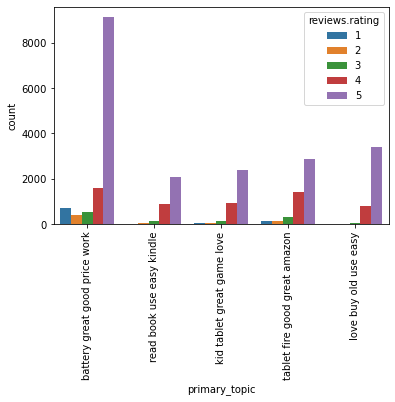

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="primary_topic", hue="reviews.rating", data=df)
plt.xticks(rotation=90)

5 star ratings are interestingly given out the most accross the board, my topics all ended up not touching so that's good. There's one topic that's clearly about a gaming tablet for kids that's well liked, then there's a tablet that is well liked, the one with the most 5 star ratings interestingly mentions the devices battery and price which suggest they may be important factors in how much someone will rate your device.

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling